In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import statistics

In [2]:
data_1 = pd.read_csv('dataset1.csv').to_numpy()
data_2 = pd.read_csv('dataset2.csv').to_numpy()

In [3]:
data_1 = np.around(data_1, decimals = 3)
data_2 = np.around(data_2, decimals = 3)

## *1.) Lloyd's Algorithm(K-Means version) for 1st Dataset*

In [46]:
def euclidean_dist(x1,x2,k):
    min_k = 0
    min_dist = np.sqrt(np.sum((x1-x2[0])**2))
    for i in range(0,k):
            dist = np.sqrt(np.sum((x1 - x2[i])**2))
            if dist < min_dist:
                min_dist = dist
                min_k = i
    return min_k, min_dist

In [47]:
def classify(init_centers,k,data):
    clusters = {}
    dist = []
    for i in data:
        min_k,min_dist = euclidean_dist(i,init_centers,k)
        dist.append(min_dist)
        key = min_k
        clusters.setdefault(key, [])
        clusters[key].append(i)
        
    return clusters,dist

In [48]:
%%time
cost = []
n_iters = []
for k in range(2,15):
    n = data_1.shape[0]
    ind = np.random.choice(n,size = k, replace = False)   
    init_centers = data_1[ind,:]
    n_iter = 1
    while (True):
        new_centers = np.empty([k,2])
        clusters,dist = classify(init_centers, k, data_1)
        keys = list(clusters.keys())
        for key in keys:
            temp = np.vstack(clusters[key])
            new_centers[key] = np.mean(temp, axis = 0)
        flag = (new_centers == init_centers).all()
        if (flag == True):
            break
        else:
            init_centers = new_centers
            n_iter += 1

    cost.append(sum(dist))
    n_iters.append(n_iter)
    
        
        
     

        

Wall time: 4min 55s


In [49]:
k = [i for i in range(2,15)]

Text(0, 0.5, 'Cost')

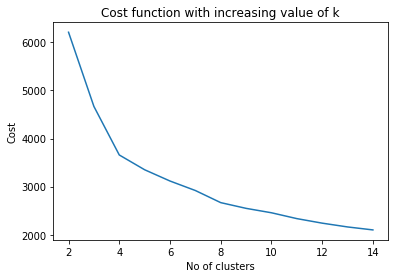

In [228]:
plt.plot(k,cost)
plt.title('Cost function with increasing value of k')
plt.xlabel('No of clusters')
plt.ylabel('Cost')

In [51]:
print('The average number of iterations used to properly cluster the dataset:')
print(statistics.mean(n_iters))

The average number of iterations used to properly cluster the dataset:
49


## *2.) Lloyd's Algorithm(K-Means version) for 2nd Dataset*

In [52]:
%%time
cost = []
n_iters = []
for k in range(2,15):
    n = data_2.shape[0]
    ind = np.random.choice(n,size = k, replace = False)   
    init_centers = data_2[ind,:]
    n_iter = 1
    while (True):
        new_centers = np.empty([k,3])
        clusters,dist = classify(init_centers, k,data_2)
        keys = list(clusters.keys())
        for key in keys:
            temp = np.vstack(clusters[key])
            new_centers[key] = np.mean(temp, axis = 0)
        flag = (new_centers == init_centers).all()
        if (flag == True):
            break
        else:
            init_centers = new_centers
            n_iter += 1

    cost.append(sum(dist))
    n_iters.append(n_iter)

Wall time: 28min 5s


In [53]:
k = [i for i in range(2,15)]

Text(0, 0.5, 'Cost')

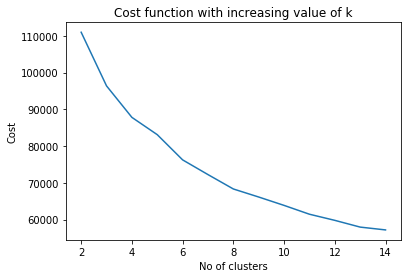

In [253]:
plt.plot(k,cost)
plt.title('Cost function with increasing value of k')
plt.xlabel('No of clusters')
plt.ylabel('Cost')

In [54]:
print('The average number of iterations used to properly cluster the dataset:')
print(statistics.mean(n_iters))

The average number of iterations used to properly cluster the dataset:
61.61538461538461


## *3.) Lloyd's Algorithm(K-Means ++ version) for 1st Dataset*

In [ ]:
def max_dist(data, pt):
    max_dist = np.sqrt(np.sum((pt-data[1])**2))
    max_pt = data[1]
    
    for i in range(0,len(data)):
        dist = np.sqrt(np.sum((pt-data[i])**2))
        if dist > max_dist:
            max_dist = dist
            max_pt = i
    return max_dist,max_pt

In [ ]:
def cal_init_centers(data, k):
    n = data.shape[0]
    ind = np.random.choice(n,size = 1, replace = False)   
    pt_1 = data[ind,:]
    dist,pt_2 = max_dist(data, pt_1)
    dist1,pt_4 = max_dist(data, pt_2)
    
    max_dist = np.sqrt(np.sum((pt-data[1,:])**2))
    pt_3 = data[1,:]
    for i in data:
        dist = np.sqrt(np.sum((pt-i)**2))
        if dist > max_dist:
            if i != pt_2:
                max_dist = dist
                pt_3 = i
    if max(dist1,max_dist) == dist1:
        return pt_4
    else:
        return pt_3
    
    
    
    
    

## *4.) Hierarchical Agglomerative Clustering (Single Linkage) on 1st Dataset*

In [4]:
from sklearn.cluster import AgglomerativeClustering

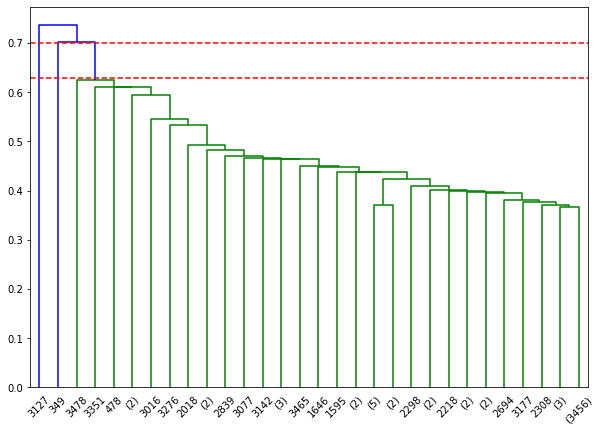

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage

link = linkage(data_1, 'single')

labelList = range(1, 3501)

plt.figure(figsize=(10, 7))
dendrogram(link, orientation='top', labels=labelList, distance_sort='descending', show_leaf_counts=True, 
           truncate_mode = 'lastp', color_threshold = 0.65)

plt.axhline(y=0.63, color='r', linestyle='--')
plt.axhline(y=0.70, color='r', linestyle='--')
plt.show()

In [26]:
h_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')
h_cluster.fit_predict(data_1)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Text(0.5, 1.0, 'Scatter plot for the first dataset with single linkage (3 clusters)')

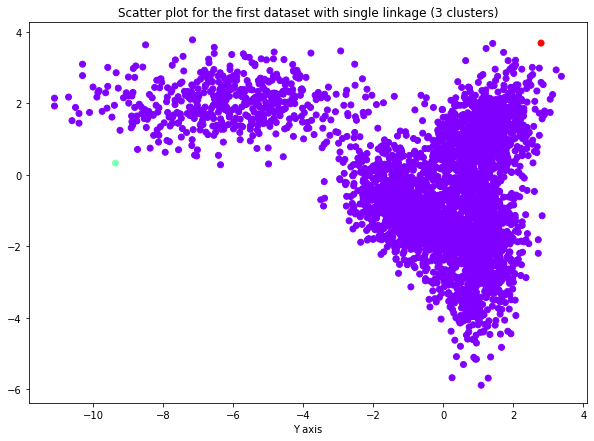

In [28]:
plt.figure(figsize = (10,7))
plt.scatter(data_1[:,0],data_1[:,1], c=h_cluster.labels_, cmap='rainbow')
plt.xlabel('X axis')
plt.xlabel('Y axis')
plt.title('Scatter plot for the first dataset with single linkage (3 clusters)')

In [317]:
cluster_one = []
cluster_two = []
cluster_three = []
for i in h_cluster.labels_:
    if i == 0:
        cluster_one.append(i)
    elif i == 1:
        cluster_two.append(i)
    else:
        cluster_three.append(i)

In [319]:
print('Length of first cluster with single linkage:')
print(len(cluster_one))
print('Length of Second cluster with single linkage:')
print(len(cluster_two))
print('Length of Third cluster with single linkage:')
print(len(cluster_three))

Length of first cluster with single linkage:
3498
Length of Second cluster with single linkage:
1
Length of Third cluster with single linkage:
1


## *5.) Hierarchical Agglomerative Clustering (Average linkage)*

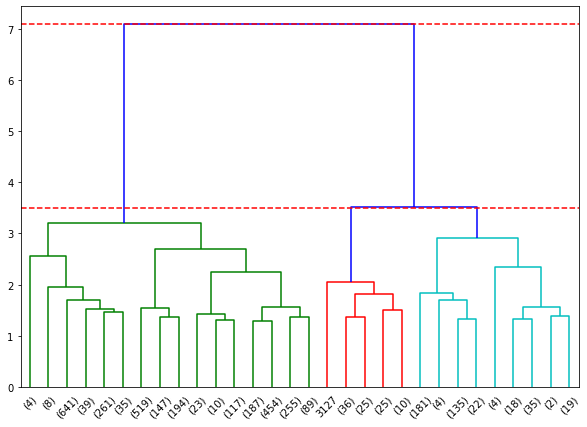

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage

link = linkage(data_1, 'average')

labelList = range(1, 3501)

plt.figure(figsize=(10, 7))
dendrogram(link, orientation='top', labels=labelList, distance_sort='descending', show_leaf_counts=True, 
           truncate_mode = 'lastp', color_threshold = 3.5)

plt.axhline(y=3.5, color='r', linestyle='--')
plt.axhline(y=7.1, color='r', linestyle='--')
plt.show()

In [29]:
h_cluster_avg = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')
h_cluster_avg.fit_predict(data_1)

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

Text(0.5, 1.0, 'Scatter plot of data points after clustering with average linkage')

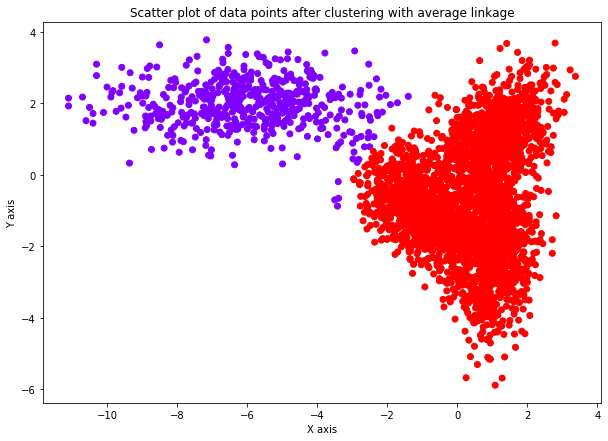

In [31]:
plt.figure(figsize = (10,7))
plt.scatter(data_1[:,0],data_1[:,1], c=h_cluster_avg.labels_, cmap='rainbow')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Scatter plot of data points after clustering with average linkage')

In [33]:
cluster_one_avg = []
cluster_two_avg = []
for i in h_cluster_avg.labels_:
    if i == 0:
        cluster_one_avg.append(i)
    elif i == 1:
        cluster_two_avg.append(i)

In [34]:
print('Length of first cluster with average linkage:')
print(len(cluster_one_avg))
print('Length of Second cluster with average linkage:')
print(len(cluster_two_avg))

Length of first cluster with average linkage:
517
Length of Second cluster with average linkage:
2983


## *6.) Hierarchical Agglomerative Clustering(Single Linkage) on the 2nd Dataset* 

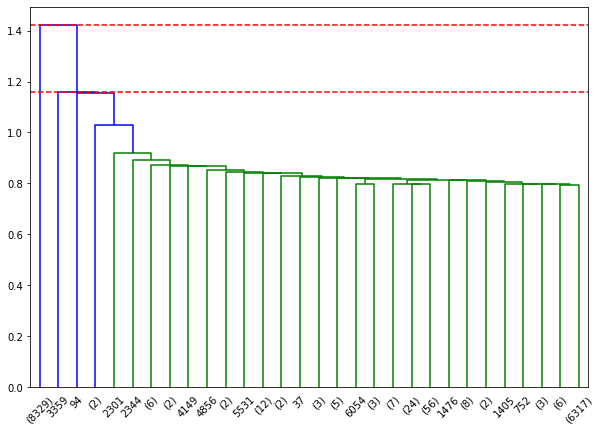

In [18]:
link_2 = linkage(data_2, 'single')

labelList_2 = range(1, 14802)

plt.figure(figsize=(10, 7))
dendrogram(link_2, orientation='top', labels=labelList_2, distance_sort='descending', show_leaf_counts=True, 
           truncate_mode = 'lastp', )

plt.axhline(y=1.16, color='r', linestyle='--')
plt.axhline(y=1.42, color='r', linestyle='--')

plt.show()

In [37]:
h_cluster_2 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
h_cluster_2.fit_predict(data_2)

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

Text(0.5, 0.92, '3D Scatter plot for the dataset divided into 2 clusters')

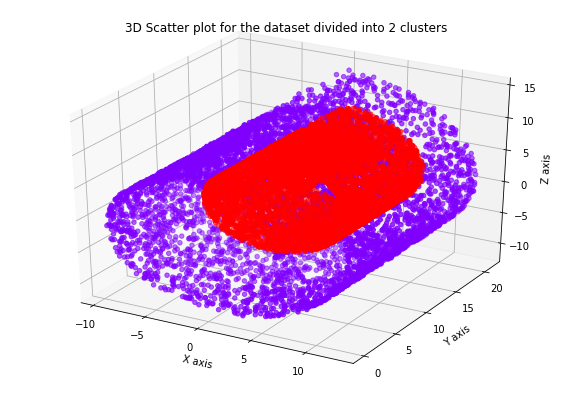

<Figure size 720x504 with 0 Axes>

In [39]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(111, projection='3d')
plt.figure(figsize = (10,7))
ax.scatter(data_2[:,0],data_2[:,1],data_2[:,2] ,c=h_cluster_2.labels_, cmap='rainbow')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D Scatter plot for the dataset divided into 2 clusters')

In [40]:
cluster2_one = []
cluster2_two = []
for i in h_cluster_2.labels_:
    if i == 0:
        cluster2_one.append(i)
    elif i == 1:
        cluster2_two.append(i)

In [41]:
print('Length of first cluster with average linkage:')
print(len(cluster2_one))
print('Length of Second cluster with average linkage:')
print(len(cluster2_two))

Length of first cluster with average linkage:
6472
Length of Second cluster with average linkage:
8329


## *7.) Hierarchical Agglomerative Clustering(Average Linkage) for 2nd dataset*

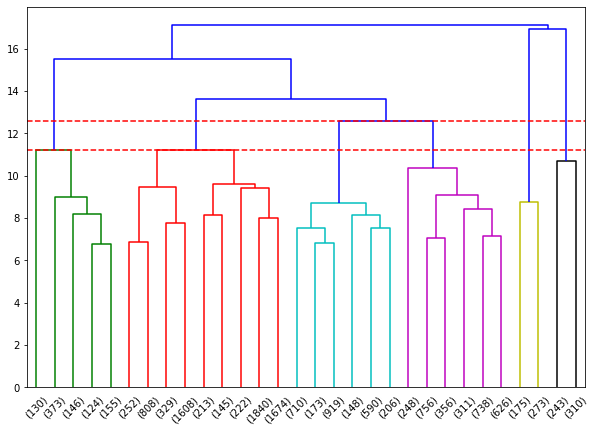

In [24]:
link_2 = linkage(data_2, 'average')

labelList_2 = range(1, 14802)

plt.figure(figsize=(10, 7))
dendrogram(link_2, orientation='top', labels=labelList_2, distance_sort='descending', show_leaf_counts=True, 
           truncate_mode = 'lastp', )

plt.axhline(y=11.2, color='r', linestyle='--')
plt.axhline(y=12.6, color='r', linestyle='--')

plt.show()

In [42]:
h_cluster_2_avg = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='average')
h_cluster_2_avg.fit_predict(data_2)

array([0, 3, 0, ..., 0, 0, 0], dtype=int64)

Text(0.5, 0.92, '3D Scatter plot for the dataset divided into 2 clusters')

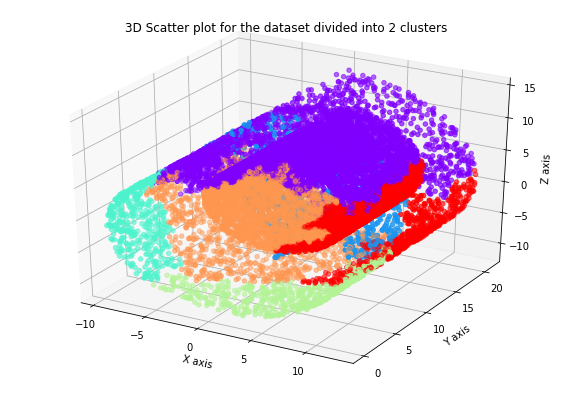

<Figure size 720x504 with 0 Axes>

In [43]:
fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(111, projection='3d')
plt.figure(figsize = (10,7))
ax.scatter(data_2[:,0],data_2[:,1],data_2[:,2] ,c=h_cluster_2_avg.labels_, cmap='rainbow')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D Scatter plot for the dataset divided into 2 clusters')

In [44]:
cluster2_one_avg = []
cluster2_two_avg = []
cluster2_three_avg = []
cluster2_four_avg = []
cluster2_five_avg = []
cluster2_six_avg = []
for i in h_cluster_2_avg.labels_:
    if i == 0:
        cluster2_one_avg.append(i)
    elif i == 1:
        cluster2_two_avg.append(i)
    elif i == 2:
        cluster2_three_avg.append(i)
    elif i == 3:
        cluster2_four_avg.append(i)
    elif i == 4:
        cluster2_five_avg.append(i)
    else:
        cluster2_six_avg.append(i)

In [45]:
print('Length of first cluster with average linkage:')
print(len(cluster2_one_avg))
print('Length of Second cluster with average linkage:')
print(len(cluster2_two_avg))
print('Length of Third cluster with average linkage:')
print(len(cluster2_three_avg))
print('Length of Fourth cluster with average linkage:')
print(len(cluster2_four_avg))
print('Length of Fifth cluster with average linkage:')
print(len(cluster2_five_avg))
print('Length of Sixth cluster with average linkage:')
print(len(cluster2_six_avg))

Length of first cluster with average linkage:
7091
Length of Second cluster with average linkage:
928
Length of Third cluster with average linkage:
448
Length of Fourth cluster with average linkage:
553
Length of Fifth cluster with average linkage:
3035
Length of Sixth cluster with average linkage:
2746
